In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
base_path = os.path.dirname(os.getcwd())  # one level up from notebook folder
df_file_path = os.path.join(base_path, "Datasets", "economic_index.csv")

df = pd.read_csv(df_file_path, encoding="utf-8")
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
df = df.drop(columns = ['Unnamed: 0', 'year', 'month'])

In [4]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

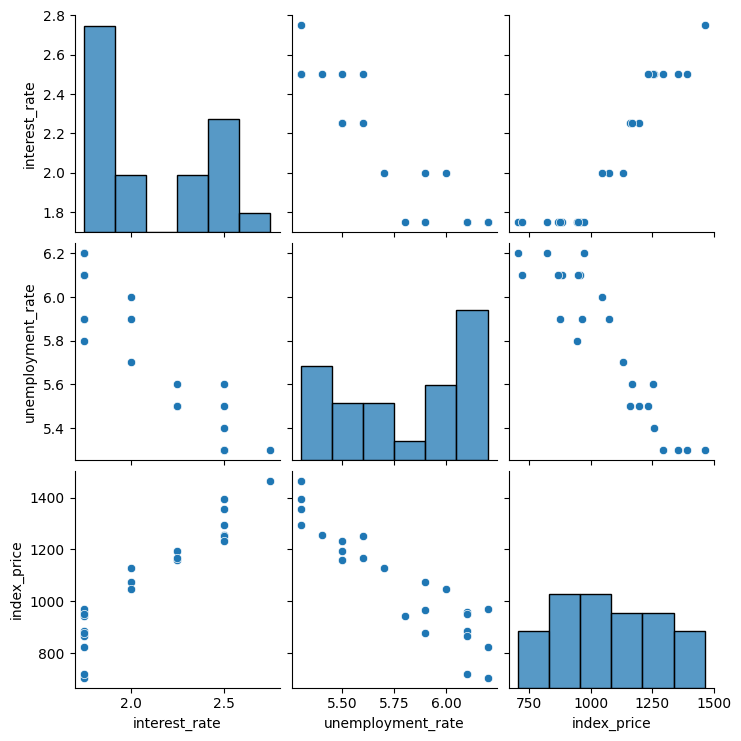

In [6]:
sns.pairplot(df)

<Axes: >

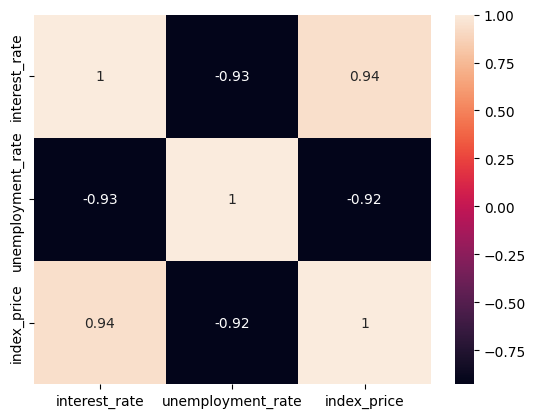

In [7]:
sns.heatmap(df.corr(), annot = True)

In [8]:
X = df.iloc[:,:-1]
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [9]:
y = df.iloc[:,-1]
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.25,
                                                       random_state=42)

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [13]:
#Cross validation
val_score = cross_val_score(lr, X_train, y_train,
                 scoring = "neg_mean_squared_error",
                 cv = 3)

In [14]:
val_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [15]:
np.mean(val_score)

-5914.828180162388

In [16]:
y_pred = lr.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

Validation Assumptions

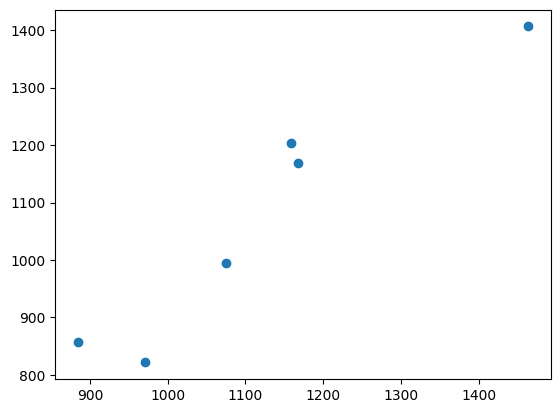

In [17]:
plt.scatter(y_test, y_pred)
#should be linear

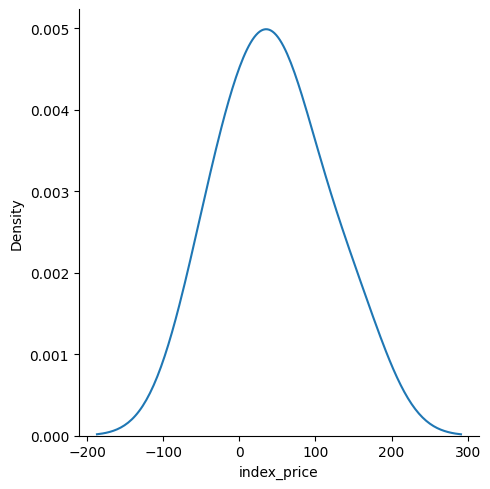

In [18]:
residuals = y_test - y_pred
sns.displot(residuals, kind = 'kde')
#should have a hill curve

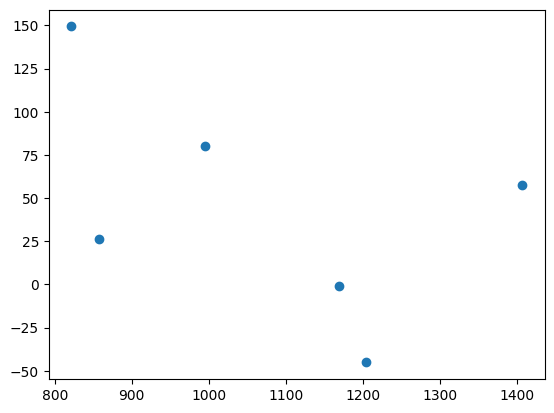

In [19]:
plt.scatter(y_pred, residuals)
#should have no pattern